In [7]:
import torch

tensor=torch.tensor([1,2,3])
#tensor+10,tensor*10,torch.mul(tensor,10),torch.multiply(tensor,10)
tensor@tensor,torch.matmul(tensor,tensor)


RuntimeError: self must be a matrix

In [13]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [20]:
import torch
T1 = torch.tensor([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
# 假设是时间步T2
T2 = torch.tensor([[10, 20, 30],
                 [40, 50, 60],
                 [70, 80, 90]])
y=torch.stack((T1,T2),dim=1)
y
x=torch.permute(T1,(1,0))
x,T1.T

(tensor([[1, 4, 7],
         [2, 5, 8],
         [3, 6, 9]]),
 tensor([[1, 4, 7],
         [2, 5, 8],
         [3, 6, 9]]))

In [42]:
def outer(some_func):
    def inner():
        print("before some_func")
        ret = some_func()
        return ret + 1
    return inner

def foo():
    return 1

foo = outer(foo)
foo()

before some_func


2

(torch.Size([3, 256, 256]), None)

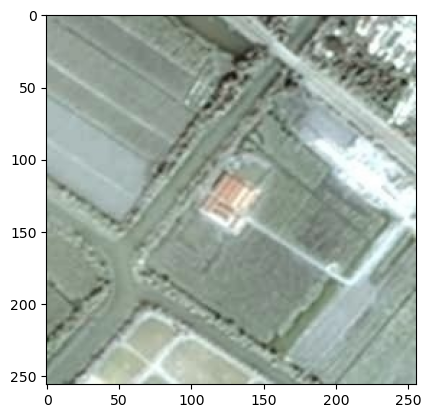

In [3]:
import time

import torch
from dataTreat.readData import LzgdDataset,img_transforms
import numpy as np
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import os,cv2
import numpy as np
import visualization.visualizationTool as visTool


train_img_dir='data/trainImg'
train_label_dir='data/trainLabel1'

trainDataset = LzgdDataset(train_img_dir,train_label_dir,img_transforms)
trainDataloader = DataLoader(trainDataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)
type(trainDataset),len(trainDataset)

valid_img_dir='data/validImg'
valid_label_dir='data/validLabel1'

validDataset = LzgdDataset(valid_img_dir,valid_label_dir,img_transforms)
validDataloader = DataLoader(validDataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)

# for step,(img,label) in enumerate(validDataloader):
#     print(label.shape)
#     print(os.path.basename(validDataloader.dataset.data_list[step]))
img,label=trainDataloader.dataset[2]
img.shape,visTool.showImage(img)

(torch.Size([3, 256, 256]), torch.Size([1, 3, 128, 128]), None)

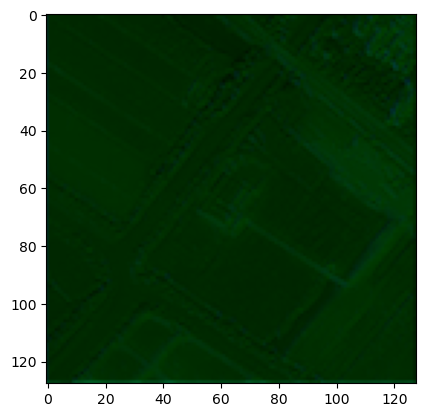

In [4]:
from torch import nn,optim
from module.module import TestModel
from module.FCNModule import FCN
from module.unet import UNet
import matplotlib.pyplot as plt
from module.unetplusplusModule import NestedUNet


# visTool.showImageByElementOfDataset(trainDataloader.dataset[0])

# conv_layer = nn.Conv2d(in_channels=3,out_channels=3,kernel_size=3,stride=1,padding=1)
# conv_layer2 = nn.Conv2d(in_channels=3,out_channels=3,kernel_size=5,stride=1,padding=0)

# res=conv_layer(img).detach()
# res2=conv_layer2(img).detach()

torch.manual_seed(60)
# model=NestedUNet(num_classes=3).cuda()
model=TestModel(input_shape=3,hidden_units=3).cuda()
res=model(img.cuda().unsqueeze(dim=0)).cpu().detach()


img.shape,res.shape,visTool.showImage(res),
#model.state_dict()